# 개와 고양이 이미지 분류기 만들기

https://www.kaggle.com/tongpython/cat-and-dog

In [7]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

path = './cat-dog'

## 이미지 전처리

* 데이터 증식 : 기존의 데이터에서 약간의 변형을 갖는 새로운 데이터를 생성하는 과정입니다. 데이터 증식은 데이터의 다양성을 확보함으로써 기계학습에서 모델의 과적합을 방지하고 성능을 향상시키는 데 도움을 줍니다.

데이터 증식(Data argumentaion)을 위해 케라스에서 제공하는 이미지 제너레이터를 사용합니다.
이미지의 위치를 조금 옮긴다거나, 회전, 좌우반전등을 했을 때 컴퓨터가 받아들이는 이미지는 전혀 다른것이 됩니다.  
이러한 변형을 줌으로써 학습 데이터를 늘리고, 이러한 변조에 강하게 모델을 학습시킬 수 있습니다.  

- rescale은 이미지의 nomalization을 위해 사용합니다. 각 이미지별로 255로 나눈 값으로 데이터가 변형됩니다.  
- rotation_range는 이미지의 최대 회전각을 지정합니다. 최대 20도까지 회전합니다.  
- width,height shift_range는 이미지의 이동을 말합니다. 좌우, 위아래로 이미지의 이동하는 백분율을 지정합니다. (0.1은 10%)  
- brightness_range는 이미지 밝기에 대한 내용입니다.  
- horizontal_flip은 이미지의 수평 반전을 시켜줍니다.  
    - 이 옵션의 경우 데이터셋의 이해가 필요합니다.  
    - 예를 들면 MNIST 데이터셋의 경우 손글씨 데이터이기 때문에 수평 반전이 일어나면 안됩니다.  
- validation_split은 검증세트의 비율을 지정해줍니다.

In [8]:
imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

In [9]:
trainGen = imageGenerator.flow_from_directory(
    os.path.join('./cat-dog/trainging_set'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join('./cat-dog/training_set'),
    target_size=(64, 64),
    subset='validation'
)

Found 7205 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## 모델링

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Dropout

In [41]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2))
model.add(Dropout(rate=0.1))

#model.add(Conv2D(8, 3, padding='same', activation='relu'))
#model.add(MaxPooling2D(2))
#model.add(layers.Dropout(rate=0.1))

#model.add(Conv2D(64, 3, padding='same', activation='relu'))
#model.add(MaxPooling2D(2))
#model.add(layers.Dropout(rate=0.3))

model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(layers.Dropout(rate=0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                262160    
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 34        
Total params: 262,642
Trainable params: 262,642
Non-trainable params: 0
_______________________________________________

In [42]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [43]:
epochs = 1
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

Epoch 1/1
7205/7205 [==============================] - 1606s 223ms/step - loss: 0.5632 - acc: 0.7073 - val_loss: 0.5140 - val_acc: 0.7397


In [ ]:
pd.DataFrame(history.history).plot(figsize=(12, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

In [18]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(path, 'test_set'),
    target_size=(64, 64),
)

model.evaluate_generator(testGen)

Found 2023 images belonging to 2 classes.


[0.25400370359420776, 0.7587741017341614]

예측: 개
정답: 개


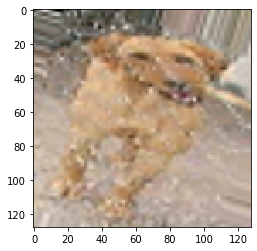

In [44]:
cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))